# Sample Notebook for the Data Analytics Hackathon

* The notebook that you submit **must** run (without *any* errors), and create a `submission.csv` file, in the required format.

* This notebook should serve as a template to your final notebook submission.

In [50]:
# pip install pmdarima --user
#pip install pandas statsmodels


In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import pmdarima as pm



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

`index_col` helps you to retain the index as provided in the dataset.

In [52]:
train = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv", index_col = 0)
test = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv", index_col = 0)

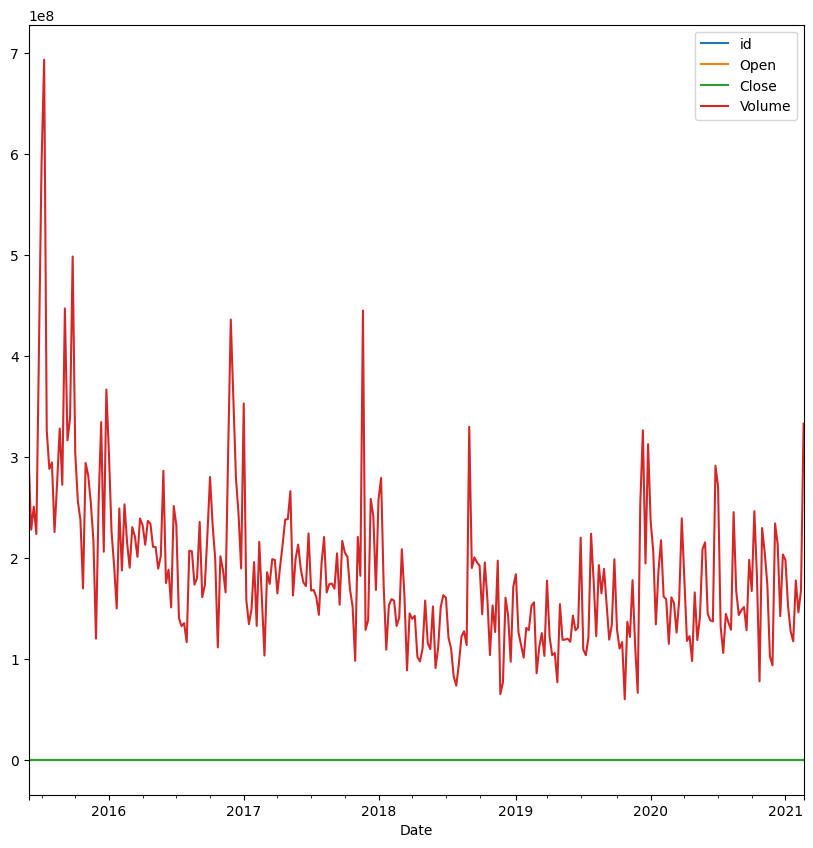

In [53]:
train.plot(figsize=(10,10))
plt.show()

In [54]:
print(train.head())
print(test.head())

            id       Open      Close     Volume Strategy
Date                                                    
2015-06-01   0  66.208486  75.609978  298506300     Hold
2015-06-08   1  64.116235  74.443331  227974800     Hold
2015-06-15   2  47.701942  71.140831  250670900      Buy
2015-06-22   3  54.754816  72.881344  223614300     Hold
2015-06-29   4  48.031899  66.284718  406814900      Buy
            id       Open     Volume
Date                                
2021-03-01   0  72.708331  205897600
2021-03-08   1  73.310886  214095600
2021-03-15   2  70.610119  151601700
2021-03-22   3  70.256017  193982500
2021-03-29   4  68.258324  220238400


In [55]:
print(train.isnull().sum())

id          0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64


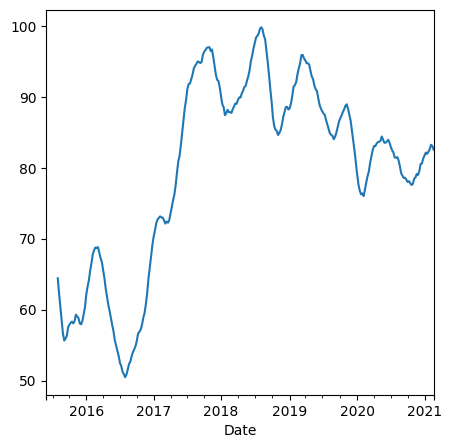

In [56]:
roll = train.Close.rolling(window=10).mean()
roll.plot(figsize=(5,5))
plt.show()

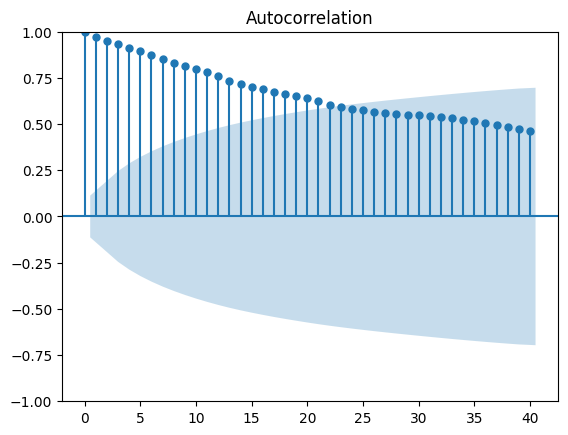

In [57]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(train['Close'], lags=40)
plt.show()

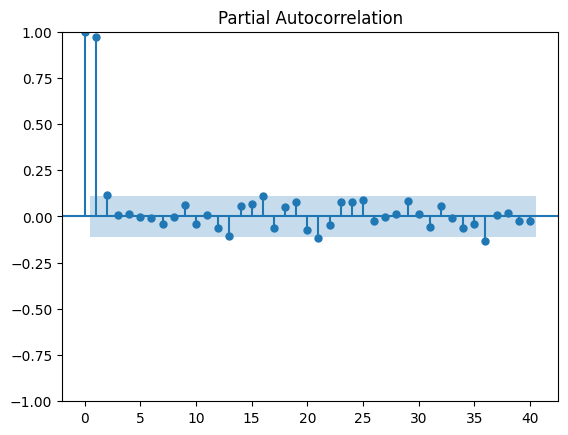

In [58]:
fig = tsaplots.plot_pacf(train['Close'], lags=40)
plt.show()

<AxesSubplot: >

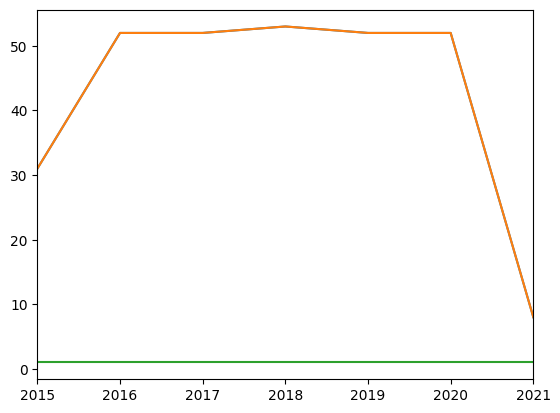

In [59]:
train.index.value_counts().resample('Y').sum().plot.line()
train.index.value_counts().resample('Y').count().plot.line()
train.index.value_counts().sort_values().plot.line()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

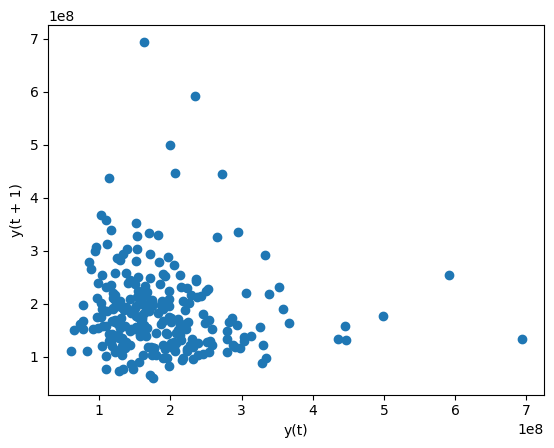

In [60]:
lag_plot(train['Volume'].sample(250))

In [1]:
autocorrelation_plot(train['Close'])

NameError: name 'autocorrelation_plot' is not defined

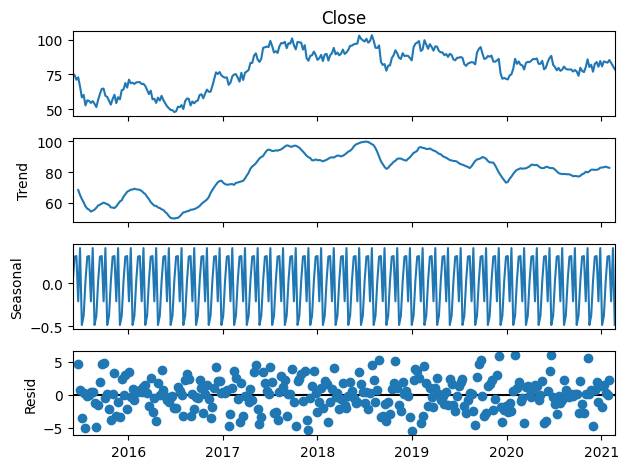

In [62]:
import statsmodels.api as sm

# Decompose the time series into its components
decomposition = sm.tsa.seasonal_decompose(train['Close'], model='additive',period=7)
decomposition.plot()

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [63]:
from statsmodels.tsa.stattools import adfuller

series = train['Close']
adfuller(series)

(-1.8080055426222832,
 0.3764944697922207,
 1,
 298,
 {'1%': -3.4524859843440754,
  '5%': -2.871288184343229,
  '10%': -2.571964047565425},
 1459.2405392582477)

The p-value is 0.37, which is not lesser than 0.05, so we can say that the series is not stationary

<AxesSubplot: xlabel='Date'>

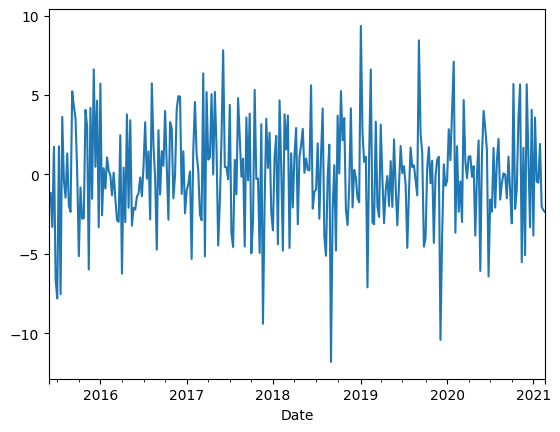

In [64]:
# first order differencing
diff = series.diff()
diff.plot()

In [65]:
adfuller(diff.dropna())

(-19.615947588858155,
 0.0,
 0,
 298,
 {'1%': -3.4524859843440754,
  '5%': -2.871288184343229,
  '10%': -2.571964047565425},
 1456.9199224078002)

As the p-value after first order differencing is 0, it can be concluded that the time series is now stationary

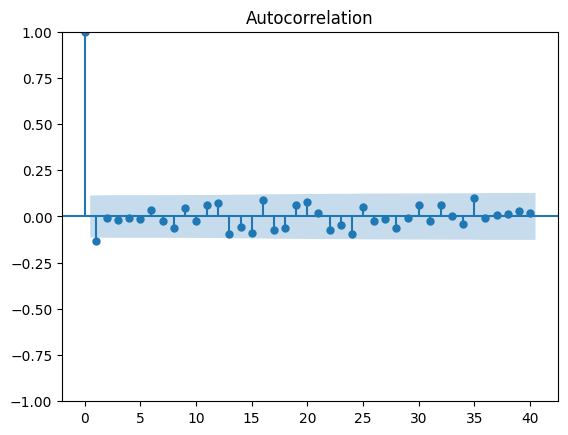

In [66]:
# from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(diff.dropna(), lags=40)
plt.show()

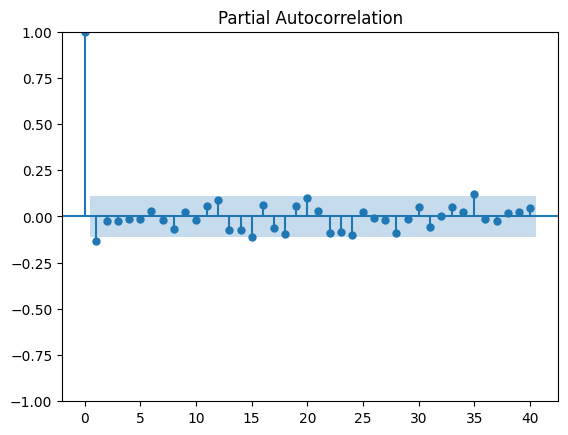

In [67]:
fig = tsaplots.plot_pacf(diff.dropna(), lags=40)
plt.show()

In [69]:
import warnings
warnings.filterwarnings("ignore")

import itertools

p=q=range(0,5)
d = (0,1)
pdq = list(itertools.product(p, d, q))
store = {}
for param in pdq:
    try:
        model_arima = sm.tsa.arima.ARIMA(train.Close, order=param)
        model_arima_fit = model_arima.fit()
        store[param] = model_arima_fit.aic
        print(param, model_arima_fit.aic)
    except:
        print("hi")
sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print(sorted_dict)

(0, 0, 0) 2432.561442813245
(0, 0, 1) 2123.427178592704
(0, 0, 2) 1935.7369414614222
(0, 0, 3) 1831.1224763196542
(0, 0, 4) 1760.1729353453659
(0, 1, 0) 1557.4617996748484
(0, 1, 1) 1554.1036633203785
(0, 1, 2) 1556.0509329333518
(0, 1, 3) 1557.9044821681873
(0, 1, 4) 1559.8400204226623
(1, 0, 0) 1564.3874208626803
(1, 0, 1) 1562.0693081533518
(1, 0, 2) 1564.067630791867
(1, 0, 3) 1566.030530529878
(1, 0, 4) 1568.0210902734311
(1, 1, 0) 1554.3060691055975
(1, 1, 1) 1556.0235601799648
(1, 1, 2) 1556.4059677176183
(1, 1, 3) 1558.4028281527026
(1, 1, 4) 1561.8362867273981
(2, 0, 0) 1562.1422078223195
(2, 0, 1) 1564.0685283143046
(2, 0, 2) 1566.0639279990166
(2, 0, 3) 1568.0252964876117
(2, 0, 4) 1570.0211874254474
(2, 1, 0) 1556.1252322868504
(2, 1, 1) 1557.0949409177704
(2, 1, 2) 1559.084810296789
(2, 1, 3) 1558.2573744518802
(2, 1, 4) 1562.2112867391074
(3, 0, 0) 1564.0835853154822
(3, 0, 1) 1566.0409698849185
(3, 0, 2) 1568.0623413855712
(3, 0, 3) 1570.0206566955103
(3, 0, 4) 1567.4256

Therefore, we choose the p,d,q of our ARIMA model to be 4,1,2

In [ ]:
arima_order = (4,1,2)
model_arima = sm.tsa.arima.ARIMA(train.Close, order=arima_order)
model_arima_fit = model_arima.fit()
forecast = model_arima_fit.forecast(steps=3)
forecast

2021-03-01    78.903427
2021-03-08    77.941496
2021-03-15    77.766755
Freq: W-MON, Name: predicted_mean, dtype: float64

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(diff.dropna(),order=(1,1,1))
# history=model.fit()

In [70]:
#ARIMA
# ARIMA_model = pm.auto_arima(diff["Close"], start_p=1, start_q=1, test='adf',max_p=5, max_q=3, m=12, start_P=0, seasonal=False, d=None, D=1,
#                          trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)


In [ ]:
# SARIMA

SARIMA_model = pm.auto_arima(train['Close'], start_p=1, start_q=1, test='adf',max_p=5, max_q=3, m=12, start_P=1, seasonal=True, d=None, D=1,
                         trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)

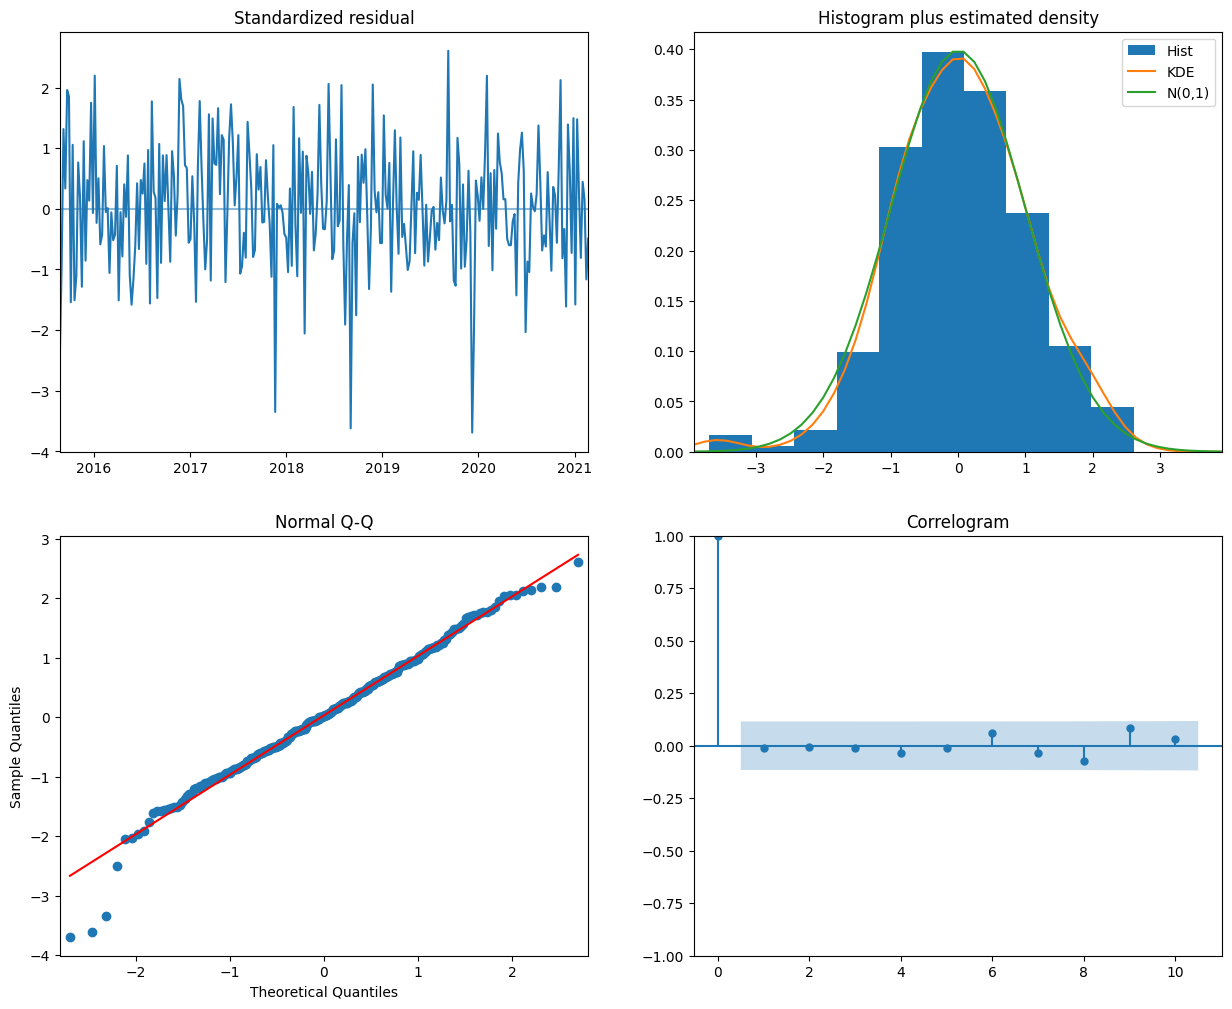

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

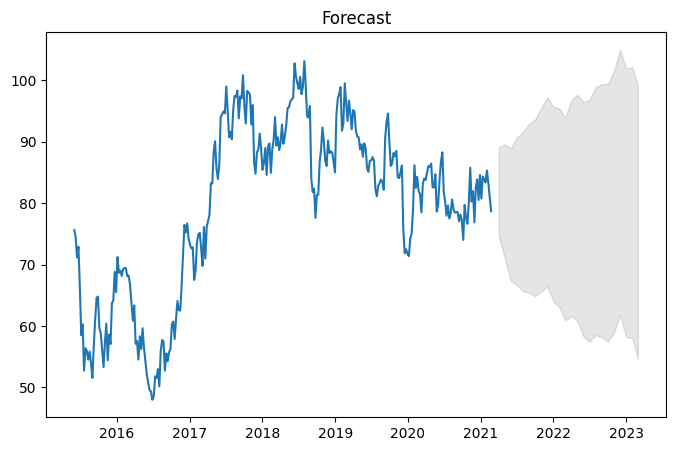

In [ ]:

n_periods = 24
fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(pd.to_datetime(train.index[-1]) + pd.DateOffset(months=1), periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(8,5))
plt.plot(train["Close"], color='#1f76b4')
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                lower_series, 
                upper_series, 
                color='k', alpha=.1)

plt.title("Forecast")
plt.show()


In [ ]:
endog = train.Close
exog = sm.add_constant(train[['Open','Volume']])
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=arima_order)
model_fit = mod.fit()

test_exog = sm.add_constant(test[['Open','Volume']])
sarimax_forecast = model_fit.forecast(exog=test_exog,steps=100)
print(sarimax_forecast)
# model_fit.summary()

2021-03-01    78.710459
2021-03-08    78.635799
2021-03-15    79.034579
2021-03-22    78.960880
2021-03-29    79.075294
                ...    
2022-12-26    80.072465
2023-01-02    79.877523
2023-01-09    79.784974
2023-01-16    80.372316
2023-01-23    80.190801
Freq: W-MON, Name: predicted_mean, Length: 100, dtype: float64


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
X_train = train[['Open','Volume']]
y_train = train['Strategy']
clf.fit(X_train, y_train)

X_test = test[['Open','Volume']]
strategy_pred = clf.predict(X_test)
strategy_pred

array(['Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Sell', 'Sell', 'Buy', 'Buy',
       'Buy', 'Buy', 'Hold', 'Hold', 'Buy', 'Sell', 'Buy', 'Hold', 'Sell',
       'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Sell',
       'Hold', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Buy',
       'Sell', 'Hold', 'Buy', 'Hold', 'Hold', 'Hold', 'Buy', 'Hold',
       'Hold', 'Hold', 'Hold', 'Buy', 'Buy', 'Hold', 'Hold', 'Hold',
       'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Buy',
       'Hold', 'Hold', 'Sell', 'Buy', 'Sell', 'Hold', 'Sell', 'Sell',
       'Sell', 'Sell', 'Hold', 'Hold', 'Hold', 'Sell', 'Sell', 'Sell',
       'Hold', 'Buy', 'Sell', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold',
       'Buy', 'Hold', 'Sell', 'Hold', 'Hold', 'Hold', 'Sell', 'Sell',
       'Hold', 'Hold'], dtype=object)

In [ ]:
submission = pd.DataFrame()
submission["Date"] = test["Date"]

In [ ]:
submission["Close"] = sarimax_forecast
submission["Strategy"] = strategy_pred

In [ ]:
submission.to_csv('submission.csv', index=True)